In [1]:
import numpy as np
import matplotlib.pyplot as plot
from bs4 import BeautifulSoup

In [6]:
import json
import pandas as pd
bf_100=[]
with open('bigfoot_first100records.json') as f:
    for i in f:
        bf_100.append(json.loads(i))
bf=[]
with open('bigfoot_data.json') as f:
    for i in f:
        bf.append(json.loads(i))

In [7]:
bf_100html=[]
for report in bf_100:
    bf1=report['html']
    bf_100html.append(bf1)

In [8]:
bf_html=[]
for report in bf:
    bf2=report['html']
    bf_html.append(bf2)

In [149]:
def get_vals(p):
    states=[]
    observation=[]
    for part in p[2:10]:
        field=[text for text in part.stripped_strings]
        if len(field) != 1:
            if "STATE:" == field[0]:
                states.append(field[1])
            elif "OBSERVED" in field[0]:
                observation.append(field[1])
    return states, observation

In [156]:
def beautifulsouper(htmls, parser='html.parser'):
    states=[]
    observation=[]
    for record in htmls:
        soup=BeautifulSoup(record, 'html.parser')
        p=soup.find_all('p')
        for part in p[2:10]:
            field=[text for text in part.stripped_strings]
            if len(field) == 2:
                if "STATE:" == field[0]:
                    states.append(field[1])
                elif "OBSERVED:" in field[0]:
                    observation.append(field[1])
    return observation, states

In [157]:
obs_100, states_100=beautifulsouper(bf_100html)

In [158]:
obs, states=beautifulsouper(bf_html)

In [192]:
states_np=np.array(states)
states_unique=np.unique(states_np, return_counts=True)
states_df=pd.DataFrame({'state':states_unique[0], 'counts':states_unique[1]})
states_df.sort_values(by='counts', inplace=True)

Text(0.5, 1.0, 'Where do we see BigFoot?')

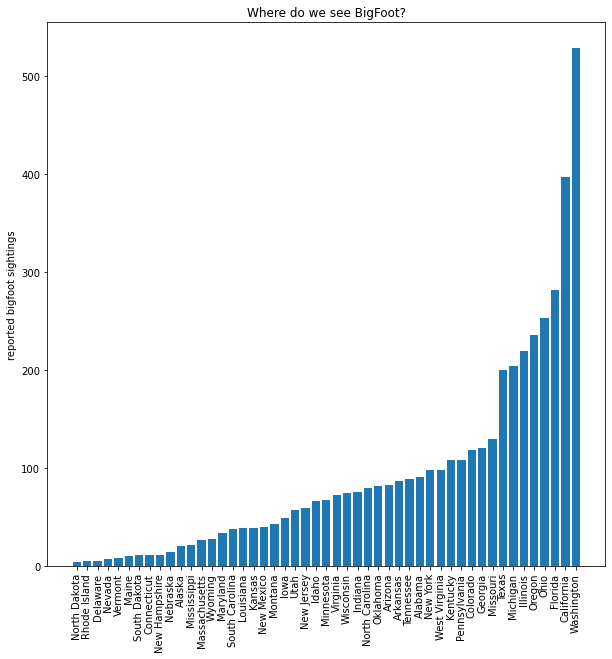

In [193]:
fig, ax=plt.subplots(figsize=(10,10))
ax.bar(states_df.iloc[:,0],states_df.iloc[:,1])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('reported bigfoot sightings')
ax.set_title('Where do we see BigFoot?')

In [168]:
obs_np=np.array(obs)
obs_unique=np.unique(obs_np, return_counts=True)
obs_unique

(array(["(Edited by investigator) Individuals from the surrounding area found one another via Facebook and began to share their stories.  The BFRO was contacted by one of these witnesses and more have come forward with their reports.  This is the first witness' story and is told in her own words.  After speaking with the reporter we decided to have her send her version of the account in her own words and that is what is displayed below.",
        '(Please see Minot Daily News Vol.88 No.63 for March 3, 2004 for full story.)',
        '(no entry)', ...,
        "winter of 1980, my older brother and i were hiking and camping in yellowstone park. after a five mile hike from the road up to a lake,(that reportedly was the only place in north america to catch arctic greyling other than in the arctic,) we set up camp for the night. after eating the days catch, and cleaning up, we settled in for bed early as we were tired from the days hike and fishing. we were in our tent, quietly talking and 

Text(0.5, 1.0, 'Where do we see BigFoot?')

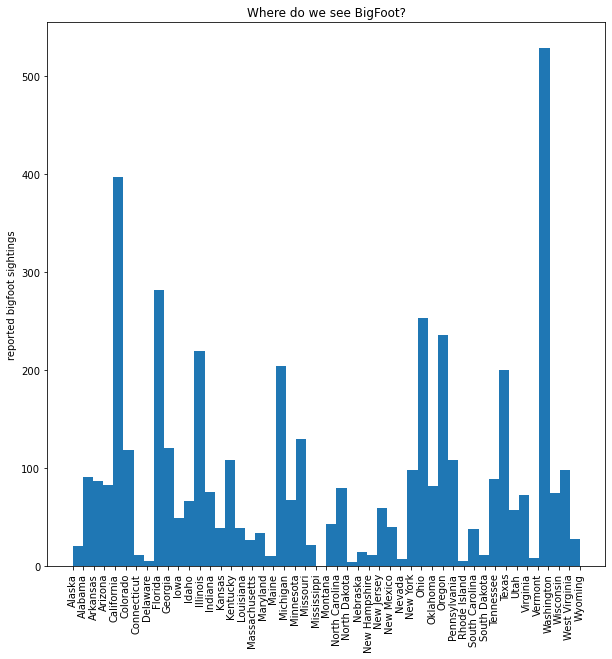

In [165]:
fig, ax=plt.subplots(figsize=(10,10))
ax.hist(states, bins=50)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('reported bigfoot sightings')
ax.set_title('Where do we see BigFoot?')

In [166]:
observations=pd.Series(obs)

In [131]:
import matplotlib.pyplot as plt

(array([20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 78.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

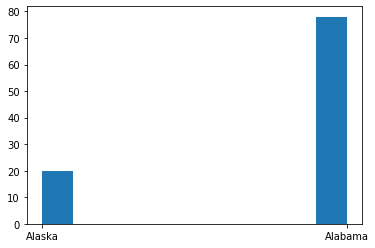

In [146]:
plt.hist(states_100)

In [130]:
obs, states=beautifulsouper(bf_html)

IndexError: list index out of range

In [93]:
values=np.array([np.array(val) for val in val_100])
type(values[0])

numpy.ndarray

In [94]:
vals=beautifulsouper(bf_html)

In [106]:
soup=BeautifulSoup(bf_html[0], 'html.parser')
p=soup.find_all('p')
len(p)

18

In [98]:
bf_cols=[]
bf_text=[]
bf_field=[]
for part in p[0:10]:
    field=[text for text in part.stripped_strings]
    bf_field.append(field)
    bf_cols.append(field[0].replace(':', ''))
    bf_text.append(field[1])

In [99]:
bf_cols

['YEAR',
 'SEASON',
 'MONTH',
 'STATE',
 'COUNTY',
 'LOCATION DETAILS',
 'NEAREST TOWN',
 'NEAREST ROAD',
 'OBSERVED',
 'ALSO NOTICED']

In [100]:
bf_100_df=pd.DataFrame((val_100), columns=bf_cols)

In [101]:
bf_100_df

,YEAR,SEASON,MONTH,STATE,COUNTY,LOCATION DETAILS,NEAREST TOWN,NEAREST ROAD,OBSERVED,ALSO NOTICED
0,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the..."
1,2003,Winter,December,Friday night,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe..."
2,1998,Fall,September,3,Alaska,Bethel County,"45 miles by air west of Lake Iliamna, Alaska i...",My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binoculars
3,2004,Summer,July,20,Alaska,Bristol Bay County,"Approximately 95 miles east of Egegik, Alaska....",Egegik,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...
4,2000,Summer,June,16,Alaska,Cordova-McCarthy County,"On the main trail toward the glacier, before t...","Kennikot, Alaska",not sure,My hiking partner and I arrived late to the Ke...
...,...,...,...,...,...,...,...,...,...,...
94,2005,Summer,June,Alabama,Talladega County,cheaha state park,Anniston,not sure,Every year me and a group of my friends camp i...,the year before this icident we heard the nois...
95,2000,Summer,July,15,Alabama,Talladega County,Salt creek falls close to Cheaha State Park,Munford,Hwy. 21,"My husband, myself and my husbands friend were..."
96,1999,Fall,11/23/1999,Alabama,Talladega County,all i know is that i was driving down hwy 21 w...,dont remember,hwy 21,sir when i came around the curve bigfoot was s...,my oldest daughter was in the front seat
97,1967,Summer,unknown,Alabama,Tallapoosa County,We were right behind a large reservoir that he...,"Alexander City, Alabama",Elkahatchee Road,"Not a good writer, but what happened to me and...",just me that saw it


In [102]:
values=np.array([np.array(val) for val in vals])
bf_df=pd.DataFrame((vals), columns=bf_cols)

In [103]:
bf_df

,YEAR,SEASON,MONTH,STATE,COUNTY,LOCATION DETAILS,NEAREST TOWN,NEAREST ROAD,OBSERVED,ALSO NOTICED
0,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the..."
1,2003,Winter,December,Friday night,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe..."
2,1998,Fall,September,3,Alaska,Bethel County,"45 miles by air west of Lake Iliamna, Alaska i...",My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binoculars
3,2004,Summer,July,20,Alaska,Bristol Bay County,"Approximately 95 miles east of Egegik, Alaska....",Egegik,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...
4,2000,Summer,June,16,Alaska,Cordova-McCarthy County,"On the main trail toward the glacier, before t...","Kennikot, Alaska",not sure,My hiking partner and I arrived late to the Ke...
...,...,...,...,...,...,...,...,...,...,...
4852,2001,Summer,July,14,Saskatchewan,Canada,Its pretty hard to explain because I dont know...,Maple Creek,Well I had camped in Cypress Hills Interprovin...,"Just the tree formations in the clearcut, they..."
4853,1995,Summer,July,Saskatchewan,Canada,It was near Barrier lake. There is a forested ...,Sylvania/Tisdale,Were driving on it.,I came across your website from following a li...,If it was a Bigfoot I am thinking it could hav...
4854,1992,Summer,August,Yukon,Canada,AT the end of Thompson Blvd. in a suburban nei...,Whitehorse,Thompson Blvd.,This incident happened in the summer of 1992 i...,Like I said it was extremely quiet. I don't re...
4855,1995,Summer,"June 14, 1995",Yukon,Canada,It was in a new part of Carmacks that was bein...,"Carmacks, YT",Highway 2,"I was about 14 years old, when me and my frien...",no


In [ ]:
def show_topics(vectorizer=count_vectorizer, model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords